In [1]:
import jax
import jax.numpy as jnp
from jax.experimental import optimizers
import os
import h5py
import numpy as onp
import time
import cardiax
import deepx
from deepx import optimise
import helx
from helx.optimise.optimisers import Optimiser
import json
import wandb
import pickle
import IPython
from IPython.display import display
from IPython.display import display_javascript
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.animation as animation
import helx
from matplotlib import rc, rcParams
import scipy.io
from functools import partial
from jax._src.numpy.lax_numpy import _promote_args_inexact
import matplotlib.ticker as mtick
import seaborn as sns
import util
import scipy.stats
import matplotlib as mpl

rc('animation', html='jshtml')
rc('text', usetex=False)
rcParams['animation.embed_limit'] = 2 ** 128
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman'] + rcParams['font.serif']


SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

%matplotlib inline

In [2]:
shape = (1200, 1200)
n_refeed = 200
n_runs = 10
divergences, divergences_control = [], []
rnmses, rnmse_controls = [], []
diff = []
legend_names = [
    "Heterogeneous spiral",
    "Heterogeneous linear",
    "Homogeneous spiral",
    "Homogeneous linear",
    "Heterogeneous spiral-control",
    "Heterogeneous linear-control",
    "Homogeneous spiral-control",
    "Homogeneous linear-control",    
]

In [3]:
filename = "rebuttal/heterogeneous_spiral_256_{}-{}.hdf5"

for seed in range(n_runs):
    # get the x, y pairs
    t = int(45_000 * 0.01 / 5)
    xs, ys, ds = util.get_xy_pair(filename, seed, t=t, n_refeed=n_refeed)
    gray = jnp.ones_like(xs) * 0.5
    
    xs_normalised = util.normalise(xs, axis=(2, 3))
    ys_normalised = util.normalise(ys, axis=(2, 3))
    
    divergences.append(util.jsd(xs, ys, axis=(2, 3)))
    divergences_control.append(util.jsd(xs, gray, axis=(2, 3)))
    
    rnmses.append(util.rnmse(xs, ys, axis=(2, 3)))
    rnmse_controls.append(util.rnmse(xs, gray, axis=(2, 3)))
    
    diff.append(jnp.max(jnp.diff(xs, axis=1), axis=(2, 3)))
#     kl_controls.append(util.kld(xs, gray, axis=(2, 3)))

Reading rebuttal/heterogeneous_spiral_256_0-fd.hdf5
Solved forward propagation to 1000ms in: 13.818147659301758s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/heterogeneous_spiral_256_1-fd.hdf5
Solved forward propagation to 1000ms in: 12.748447895050049s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/heterogeneous_spiral_256_2-fd.hdf5
Solved forward propagation to 1000ms in: 12.692785739898682s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/heterogeneous_spiral_256_3-fd.hdf5
Solved forward propagation to 1000ms in: 12.691513061523438s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/heterogeneous_spiral_256_4-fd.hdf5
Solved forward propagation to 1000ms in: 12.713174104690552s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)


In [4]:
filename = "rebuttal/heterogeneous_linear_256_{}-{}.hdf5"

for seed in range(n_runs):
    # get the x, y pairs
    t = int(55_000 * 0.01 / 5)
    xs, ys, ds = util.get_xy_pair(filename, seed, t=t, n_refeed=n_refeed)
    gray = jnp.ones_like(xs) * 0.5
    
    xs_normalised = util.normalise(xs, axis=(2, 3))
    ys_normalised = util.normalise(ys, axis=(2, 3))
    
    divergences.append(util.jsd(xs, ys, axis=(2, 3)))
    divergences_control.append(util.jsd(xs, gray, axis=(2, 3)))
    
    rnmses.append(util.rnmse(xs, ys, axis=(2, 3)))
    rnmse_controls.append(util.rnmse(xs, gray, axis=(2, 3)))
    
    diff.append(jnp.max(jnp.diff(xs, axis=1), axis=(2, 3)))
#     kl_controls.append(util.kld(xs, gray, axis=(2, 3)))

Reading rebuttal/heterogeneous_linear_256_0-fd.hdf5
Solved forward propagation to 1000ms in: 12.847744941711426s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/heterogeneous_linear_256_1-fd.hdf5
Solved forward propagation to 1000ms in: 12.776769161224365s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/heterogeneous_linear_256_2-fd.hdf5
Solved forward propagation to 1000ms in: 12.787533521652222s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/heterogeneous_linear_256_3-fd.hdf5
Solved forward propagation to 1000ms in: 12.818047046661377s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/heterogeneous_linear_256_4-fd.hdf5
Solved forward propagation to 1000ms in: 12.797744989395142s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)


In [5]:
filename = "rebuttal/homogeneous_spiral_256_{}-{}.hdf5"

for seed in range(n_runs):
    # get the x, y pairs
    t = int(45_000 * 0.01 / 5)
    xs, ys, ds = util.get_xy_pair(filename, seed, t=t, n_refeed=n_refeed)
    gray = jnp.ones_like(xs) * 0.5
    
    xs_normalised = util.normalise(xs, axis=(2, 3))
    ys_normalised = util.normalise(ys, axis=(2, 3))
    
    divergences.append(util.jsd(xs, ys, axis=(2, 3)))
    divergences_control.append(util.jsd(xs, gray, axis=(2, 3)))
    
    rnmses.append(util.rnmse(xs, ys, axis=(2, 3)))
    rnmse_controls.append(util.rnmse(xs, gray, axis=(2, 3)))
    
    diff.append(jnp.max(jnp.diff(xs, axis=1), axis=(2, 3)))
#     kl_controls.append(util.kld(xs, gray, axis=(2, 3)))

Reading rebuttal/homogeneous_spiral_256_0-fd.hdf5
Solved forward propagation to 1000ms in: 12.825584173202515s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/homogeneous_spiral_256_1-fd.hdf5
Solved forward propagation to 1000ms in: 12.788632154464722s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/homogeneous_spiral_256_2-fd.hdf5
Solved forward propagation to 1000ms in: 12.93534541130066s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/homogeneous_spiral_256_3-fd.hdf5
Solved forward propagation to 1000ms in: 12.819690465927124s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/homogeneous_spiral_256_4-fd.hdf5
Solved forward propagation to 1000ms in: 12.805887460708618s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading reb

In [6]:
filename = "rebuttal/homogeneous_linear_256_{}-{}.hdf5"

for seed in range(n_runs):
    # get the x, y pairs
    t = int(55_000 * 0.01 / 5)
    xs, ys, ds = util.get_xy_pair(filename, seed, t=t, n_refeed=n_refeed)
    gray = jnp.ones_like(xs) * 0.5
    
    xs_normalised = util.normalise(xs, axis=(2, 3))
    ys_normalised = util.normalise(ys, axis=(2, 3))
    
    divergences.append(util.jsd(xs, ys, axis=(2, 3)))
    divergences_control.append(util.jsd(xs, gray, axis=(2, 3)))
    
    rnmses.append(util.rnmse(xs, ys, axis=(2, 3)))
    rnmse_controls.append(util.rnmse(xs, gray, axis=(2, 3)))
    
    diff.append(jnp.max(jnp.diff(xs, axis=1), axis=(2, 3)))

Reading rebuttal/homogeneous_linear_256_0-fd.hdf5
Solved forward propagation to 1000ms in: 12.79640507698059s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/homogeneous_linear_256_1-fd.hdf5
Solved forward propagation to 1000ms in: 12.776606798171997s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/homogeneous_linear_256_2-fd.hdf5
Solved forward propagation to 1000ms in: 12.828252077102661s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/homogeneous_linear_256_3-fd.hdf5
Solved forward propagation to 1000ms in: 12.780390501022339s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading rebuttal/homogeneous_linear_256_4-fd.hdf5
Solved forward propagation to 1000ms in: 12.794357061386108s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)
Reading reb

In [7]:
scipy.io.savemat("tissue_size_256.mat", {
    "divergences": divergences,
    "divergences_control": divergences_control,
    "rnmses": rnmses,
    "rnmse_controls": rnmse_controls,
    "diff": diff,
})

In [3]:
mat = scipy.io.loadmat("tissue_size_256.mat")
divergences = mat["divergences"]
divergences_control = mat["divergences_control"]
rnmses = mat["rnmses"]
rnmse_controls = mat["rnmse_controls"]
diff = mat["diff"]

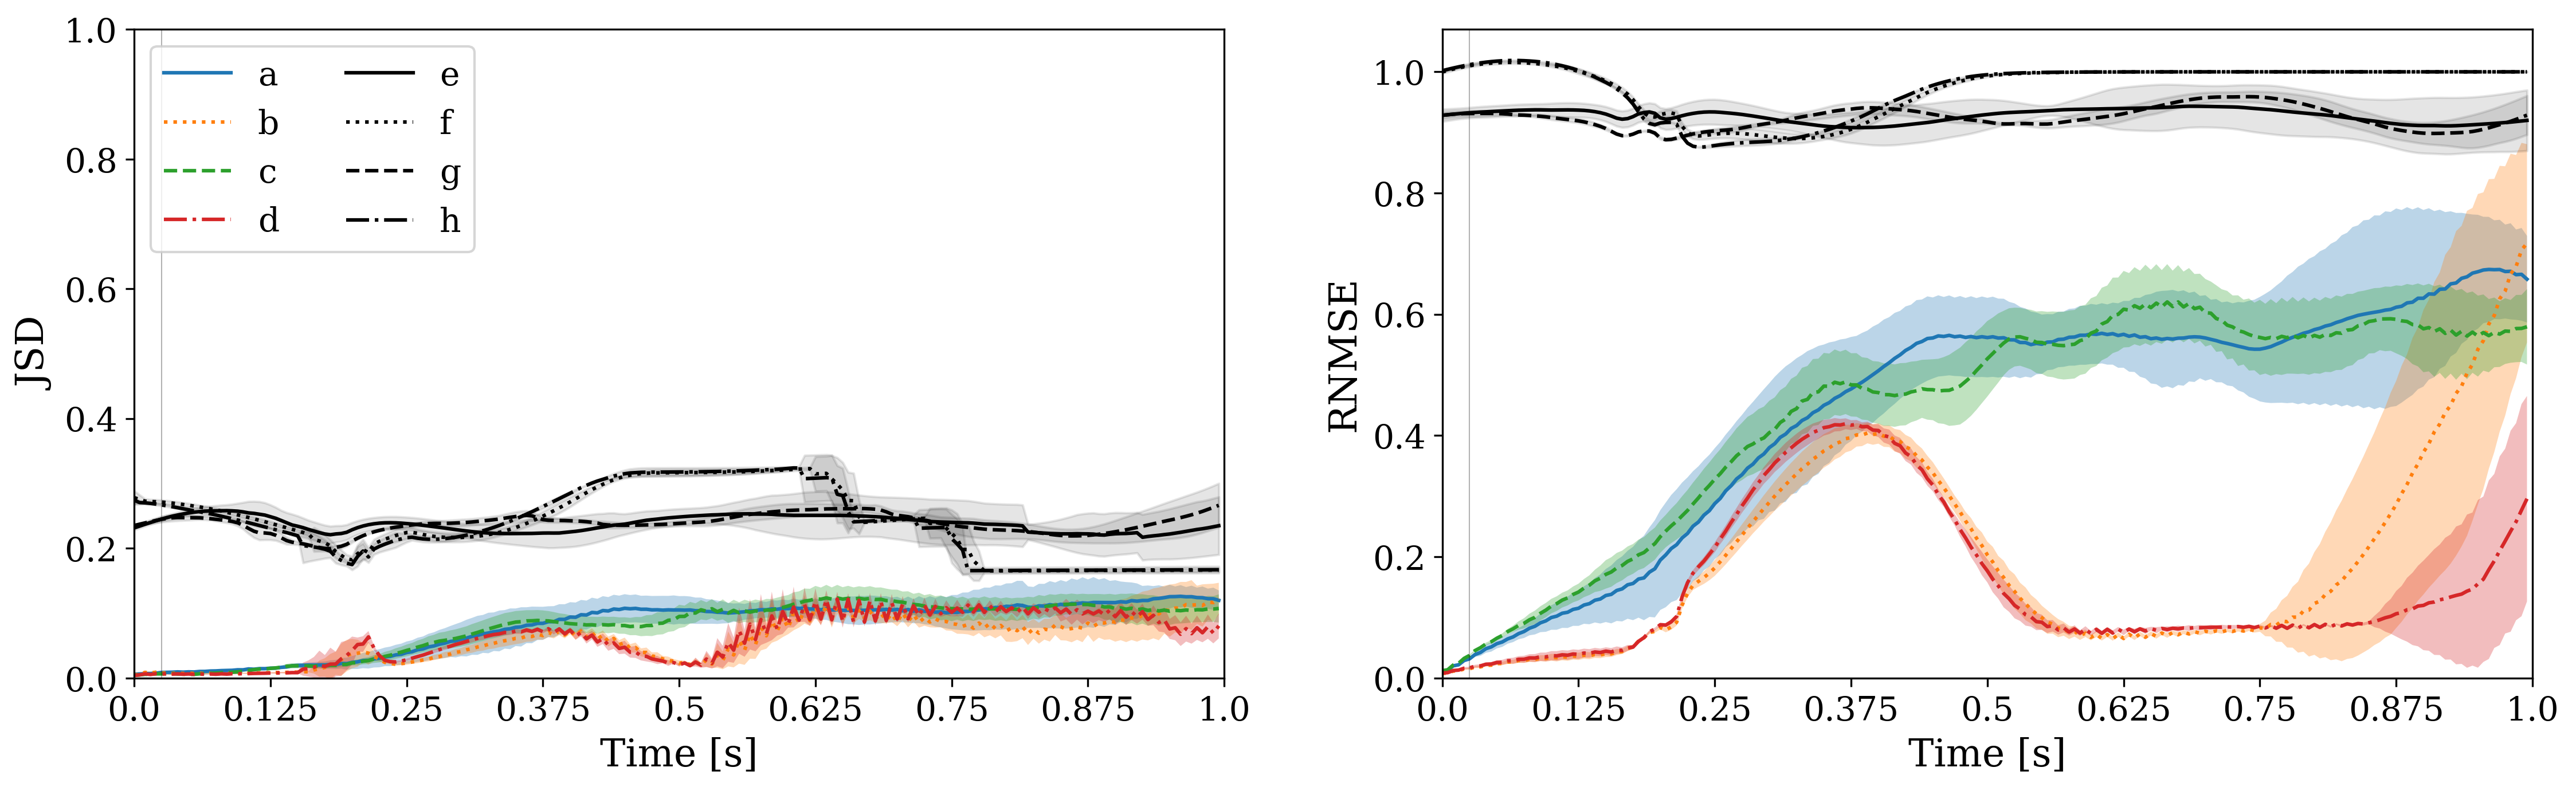

In [18]:
linestyles = ["solid", "dotted", "dashed", "dashdot"]
tissue_size = tuple([x * 0.01 for x in shape])
fig, axes = plt.subplots(1, 2, figsize=(18, 5), dpi=300)


# JS
data = jnp.array(divergences)
control = jnp.array(divergences_control)

# average over channels
data = jnp.mean(data, axis=2)
control = jnp.mean(control, axis=2)

# split regimes and tissue types
data = jnp.array(jnp.split(data, 4))
control = jnp.array(jnp.split(control, 4))
js = data

mean = jnp.mean(data, axis=1)
std = jnp.std(data, axis=1)
mean_control = jnp.mean(control, axis=1)
std_control = jnp.std(control, axis=1)
ax = axes[0]

for i, _ in enumerate(mean):
    ax.plot(mean[i], linestyle=linestyles[i])
    ax.fill_between(jnp.arange(len(std[i])), mean[i] - std[i], mean[i] + std[i], alpha=0.3)
for i, _ in enumerate(mean_control):    
    ax.plot(mean_control[i], color="black", linestyle=linestyles[i], zorder=-1)
    ax.fill_between(jnp.arange(len(std_control[i])), mean_control[i] - std_control[i], mean_control[i] + std_control[i], color="black", alpha=0.1, zorder=-1)   
ax.axvline(5, color="black", alpha=0.3, linewidth=0.5)
ax.set_xlim([0, n_refeed])
ax.set_ylim([0, 1])
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, i: "{}".format(x * 5 / 1000)))
# ax.set_title("Jensen-Shannon divergence")
ax.set_xlabel("Time [s]")
ax.set_ylabel("JSD")

# RNMSE
data = jnp.array(rnmses)
control = jnp.array(rnmse_controls)

# average over channels
data = jnp.mean(data, axis=2)
control = jnp.mean(control, axis=2)

# split regimes and tissue types
data = jnp.array(jnp.split(data, 4))
control = jnp.array(jnp.split(control, 4))
rmse = data

mean = jnp.mean(data, axis=1)
std = jnp.std(data, axis=1)
mean_control = jnp.mean(control, axis=1)
std_control = jnp.std(control, axis=1)
ax = axes[1]


for i, _ in enumerate(mean):
    ax.plot(mean[i], linestyle=linestyles[i])
    ax.fill_between(jnp.arange(len(std[i])), mean[i] - std[i], mean[i] + std[i], alpha=0.3, zorder=-1)
for i, _ in enumerate(mean_control):    
    ax.plot(mean_control[i], color="black", linestyle=linestyles[i])
    ax.fill_between(jnp.arange(len(std_control[i])), mean_control[i] - std_control[i], mean_control[i] + std_control[i], color="black", alpha=0.1, zorder=-1)  
ax.axvline(5, color="black", alpha=0.3, linewidth=0.5)
ax.set_xlim([0, n_refeed])
ax.set_ylim([0, None])
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, i: "{}".format(x * 5 / 1000)))
# ax.set_title("Normalised root mean squared error")
ax.set_xlabel("Time [s]")
ax.set_ylabel("RNMSE")

axes[0].legend([chr(i).lower() for i in range(65, 65 + 8)], loc="upper left", ncol=2)
plt.show()

(4, 10, 200)


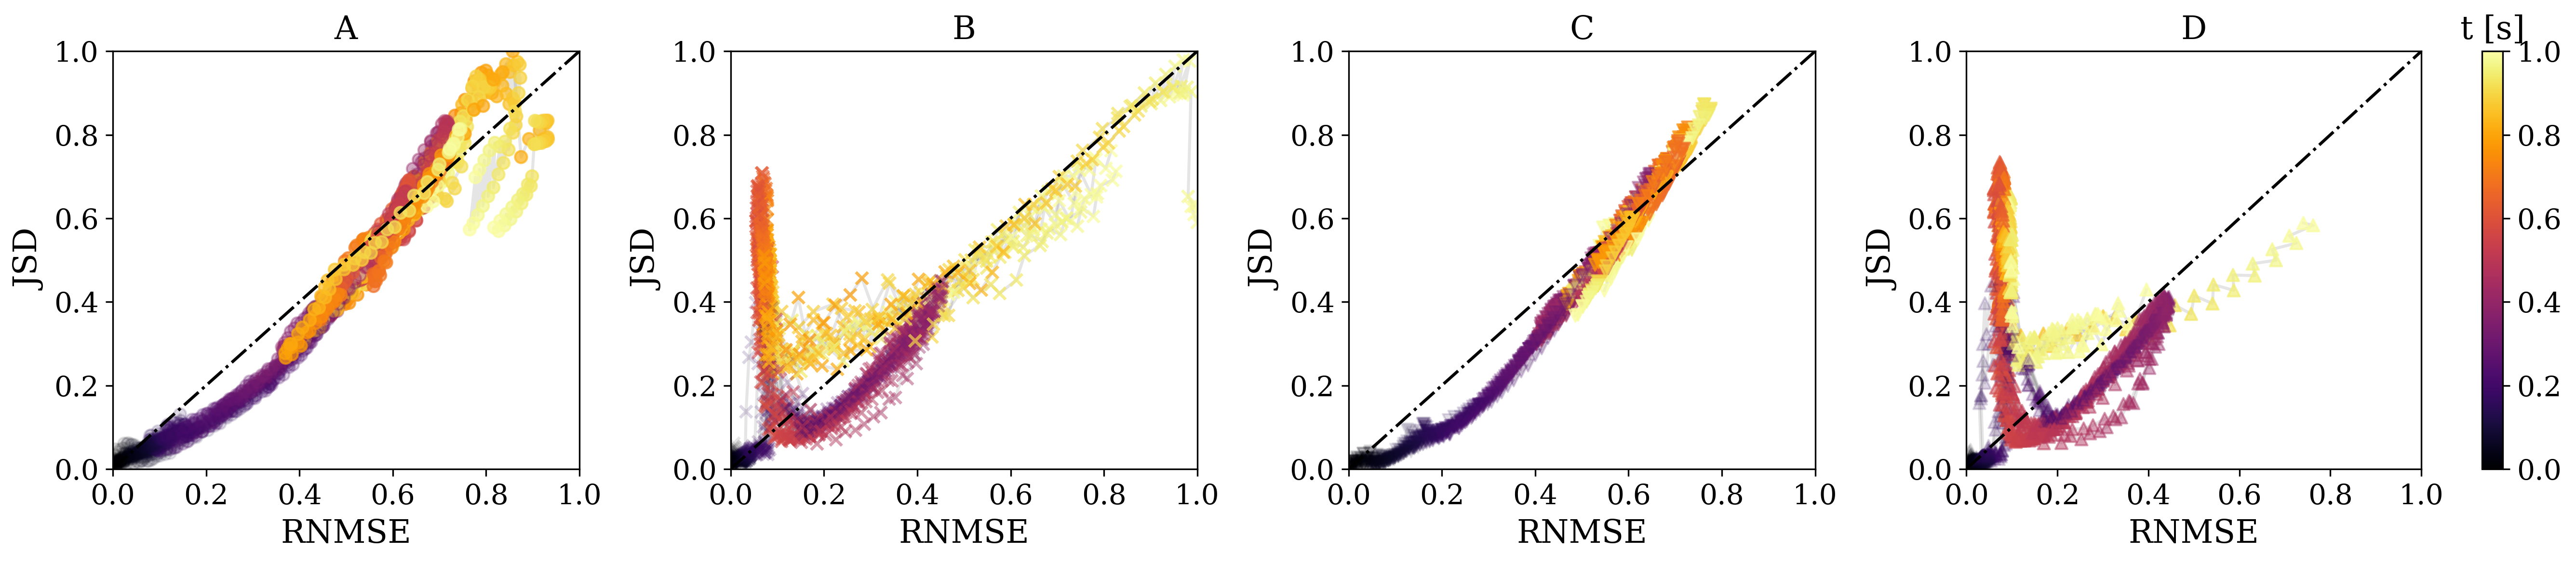

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4), gridspec_kw={'width_ratios': [1, 1, 1, 1.3]}, dpi=300)


# Pearson
# ax = axes[0]
# correlation = []
# for i in range(len(js)):
#     condition = []
#     for j in range(len(js[i])):
#         r, _ = scipy.stats.pearsonr(rmse[i, j], js[i, j])
#         condition.append(r)
#     correlation.append(condition)
# r = jnp.array(correlation)
# for i in range(len(r)):
#     ax.boxplot(r,)

print(rmse.shape)


# One against the other
ax = axes[1]
markers = ["o", "x", "v", "^"]

normalise = lambda x: (x - x.min()) / (x.max() - x.min())
x = normalise(rmse)
y = normalise(js)
t = jnp.arange(len(x[0, 0]))  / len(x[0, 0])
abc = ["A) ", "B) ", "C) ", "D) "]
cmap = cm.get_cmap("inferno")
col = lambda x: cmap(x / len(x[0, 0]))
for i in range(len(rmse)):
    ax = axes[i]
    for j in range(len(rmse[i])):
        sc = ax.scatter(x[i, j], y[i, j], marker=markers[i], c=cmap(t), alpha=jnp.clip(t, 0.1, 0.7))
        axes[i].plot(x[i, j], y[i, j], c="black", alpha=0.1, zorder=-1)
    ax.plot([0,1],[0,1], color="black", linestyle="dashdot")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title(abc[i][:-2])
    ax.set_xlabel("RNMSE")
    ax.set_ylabel("JSD")

# colorbar
norm = mpl.colors.Normalize(vmin=1, vmax=0)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, ax=ax, pad=0.1)
cb.ax.set_title("t [s]")

plt.tight_layout()
plt.show()

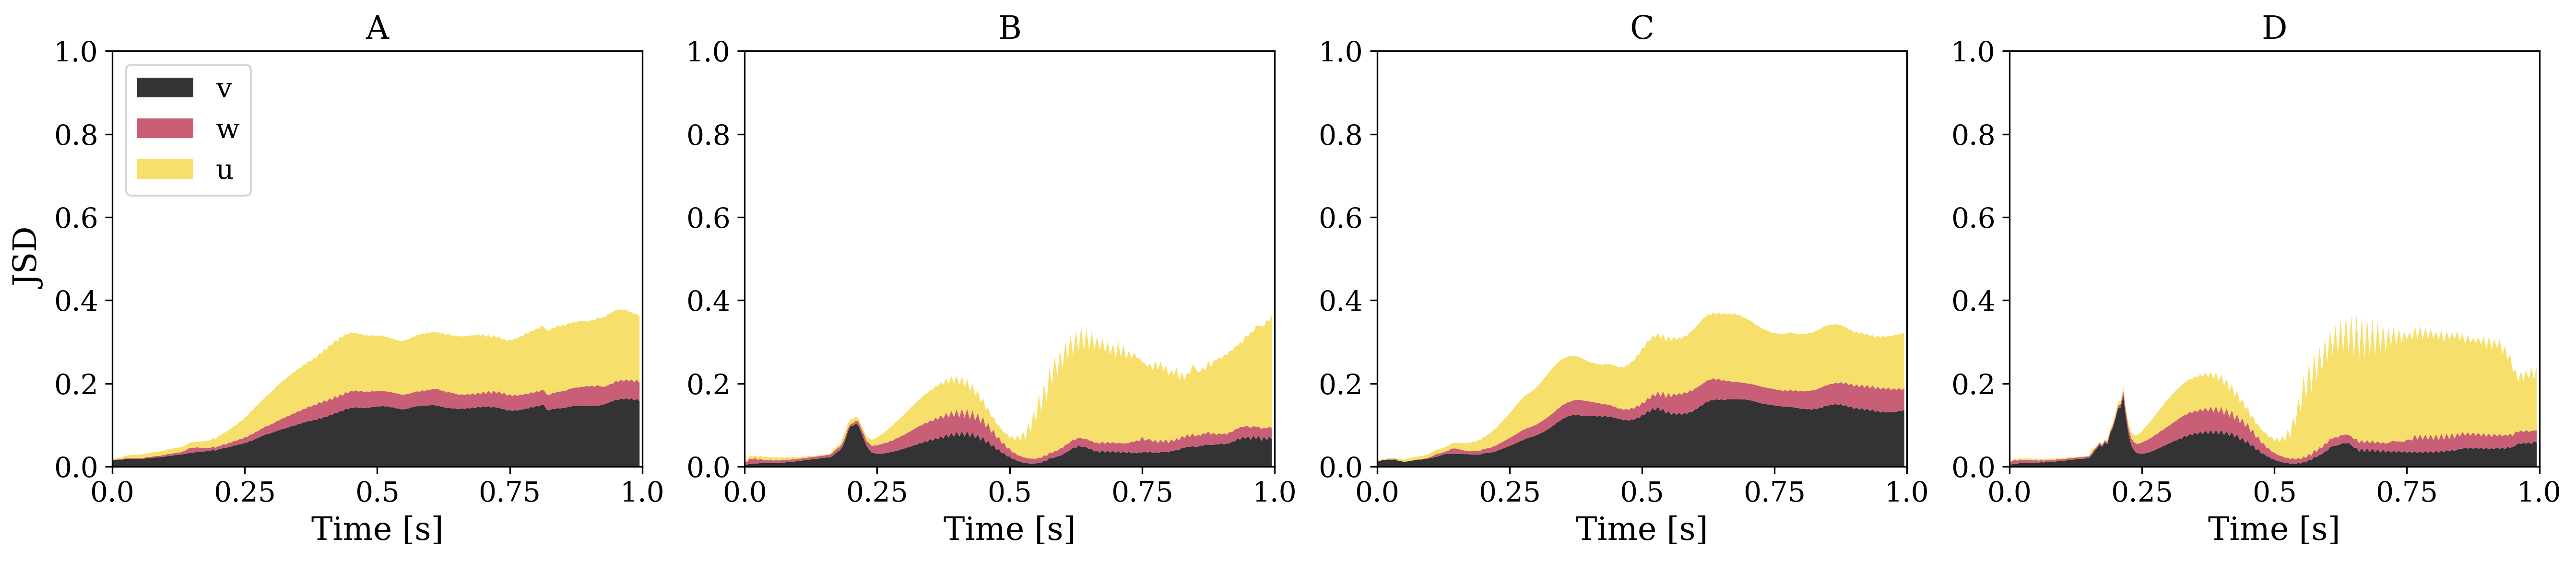

In [29]:
linestyles = ["solid", "dotted", "dashed", "dashdot"]
tissue_size = tuple([x * 0.01 for x in shape])
fig, axes = plt.subplots(1, 4, figsize=(18, 4), dpi=300)
axes = axes.flatten()


# JS
data = jnp.array(divergences)
control = jnp.array(divergences_control)

# split regimes and tissue types
data = jnp.array(jnp.split(data, 4))
control = jnp.array(jnp.split(control, 4))
js = data

mean = jnp.mean(data, axis=1).transpose((0, 2, 1))
std = jnp.std(data, axis=1).transpose((0, 2, 1))
mean_control = jnp.mean(control, axis=1)
std_control = jnp.std(control, axis=1)

# mean is [COND, CHANNELS, TIME]
colors = cm.get_cmap("inferno")
colors = [colors(i) for i in [0, 0.5, 0.9]]
for i, _ in enumerate(mean):
    ax = axes[i]
    ax.stackplot(range(len(mean[i, 0])), *mean[i], alpha=0.8, colors=colors)
    ax.set_xlim([0, n_refeed])
    ax.set_ylim([0, 1])
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, i: "{}".format(x * 5 / 1000)))
    # ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(abc[i][:-2])
    ax.set_xlabel("Time [s]")
axes[0].set_ylabel("JSD")


axes[0].legend(["v", "w", "u"], loc="upper left", ncol=1)
plt.tight_layout()
plt.show()

In [32]:
rmse.shape

(4, 10, 200)

In [42]:
a = jnp.ones((200, 3, 256, 256))

delta = jnp.max(jnp.diff(a, axis=0), axis=(2, 3))

In [43]:
delta.shape

(199, 3)

In [241]:
t = int(55_000 * 0.01 / 5)
x, y, d = util.get_xy_pair("rebuttal/homogeneous_spiral_256_{}-{}.hdf5", 0, t, n_refeed)

Reading rebuttal/homogeneous_spiral_256_0-fd.hdf5
Solved forward propagation to 1000ms in: 12.712290287017822s
x shape is (200, 3, 256, 256); y shape is (200, 3, 256, 256); d shape is (2, 256, 256)


In [236]:
def recovery_error(a, b, cutoff=0.1):
    "Measures the percentage of error belonging to the recovery phase"
    error = jnp.abs(a - b)
    u_xt = a[:, -1]
    u_yt = b[:, -1]
    error = jnp.abs(u_xt - u_yt)

    du_dt =jnp.diff(u_xt, axis=0)
    t_recovery = jnp.argmin(du_dt, axis=0)
#     mask = du_dt[t_recovery] >= -0.1
    t = jnp.arange(len(u_xt)).reshape((len(u_xt), 1, 1))
    t = jnp.broadcast_to(t, (len(u_xt), ) + (u_xt.shape[-2:]))
    mask = t > t_recovery
    
    err_recovery = jnp.sum(error * mask)
    err_other = jnp.sum(error * jnp.logical_not(mask))
    total_error = err_recovery + err_other
    return t_recovery, err_recovery / total_error, err_other / total_error

In [237]:
t_recovery, err_recovery, err_other = recovery_error(x, y)

In [240]:
err_recovery

DeviceArray(0.85570157, dtype=float32)

In [239]:
err_other

DeviceArray(0.14429842, dtype=float32)

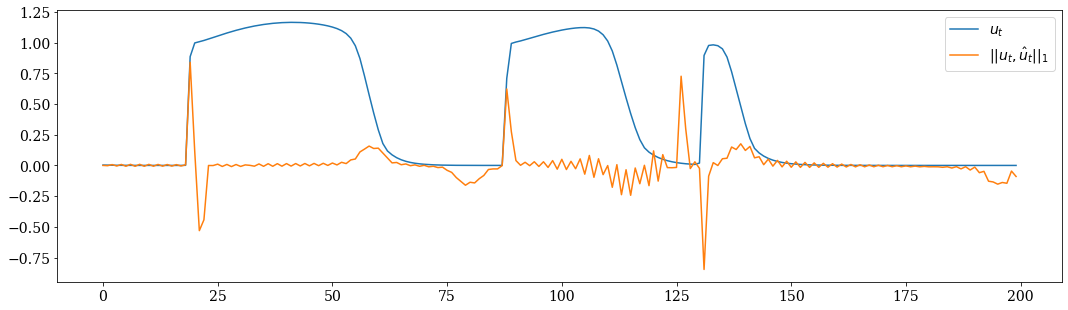

In [270]:
fig = plt.figure(figsize=(18, 5))
p = 200
q = 128
error = jnp.abs(x - y)
u_xt = x[:, -1, p, q]
u_yt = y[:, -1, p, q]
e = error[:, -1, p, q]
du_dt = jnp.diff(u_xt, prepend=u_xt[0])
de_dt = jnp.diff(e, prepend=e[0:1])

plt.plot(u_xt)
# plt.plot(u_yt)
plt.plot(de_dt)
# plt.plot(du_dt)
plt.legend(["$u_t$", "$||u_t, \hat{u}_t ||_1$", "$\partial u / \partial t$"])

In [ ]:
x = util.read("rebuttal/heterogeneous_linear_256_{}-{}.hdf5".format(0, "fd"), 0).squeeze()
_ = util.animate_state(x[:, :3], x[0, 3], figsize=(7, 2))

In [ ]:
_ = util.animate_state(xs, ds[0], figsize=(7, 2))

In [ ]:
_ = util.animate_state(ys, ds[0], figsize=(7, 2))